0 - Evolution sur les 500 derniers jours

<Axes: xlabel='timestamp'>

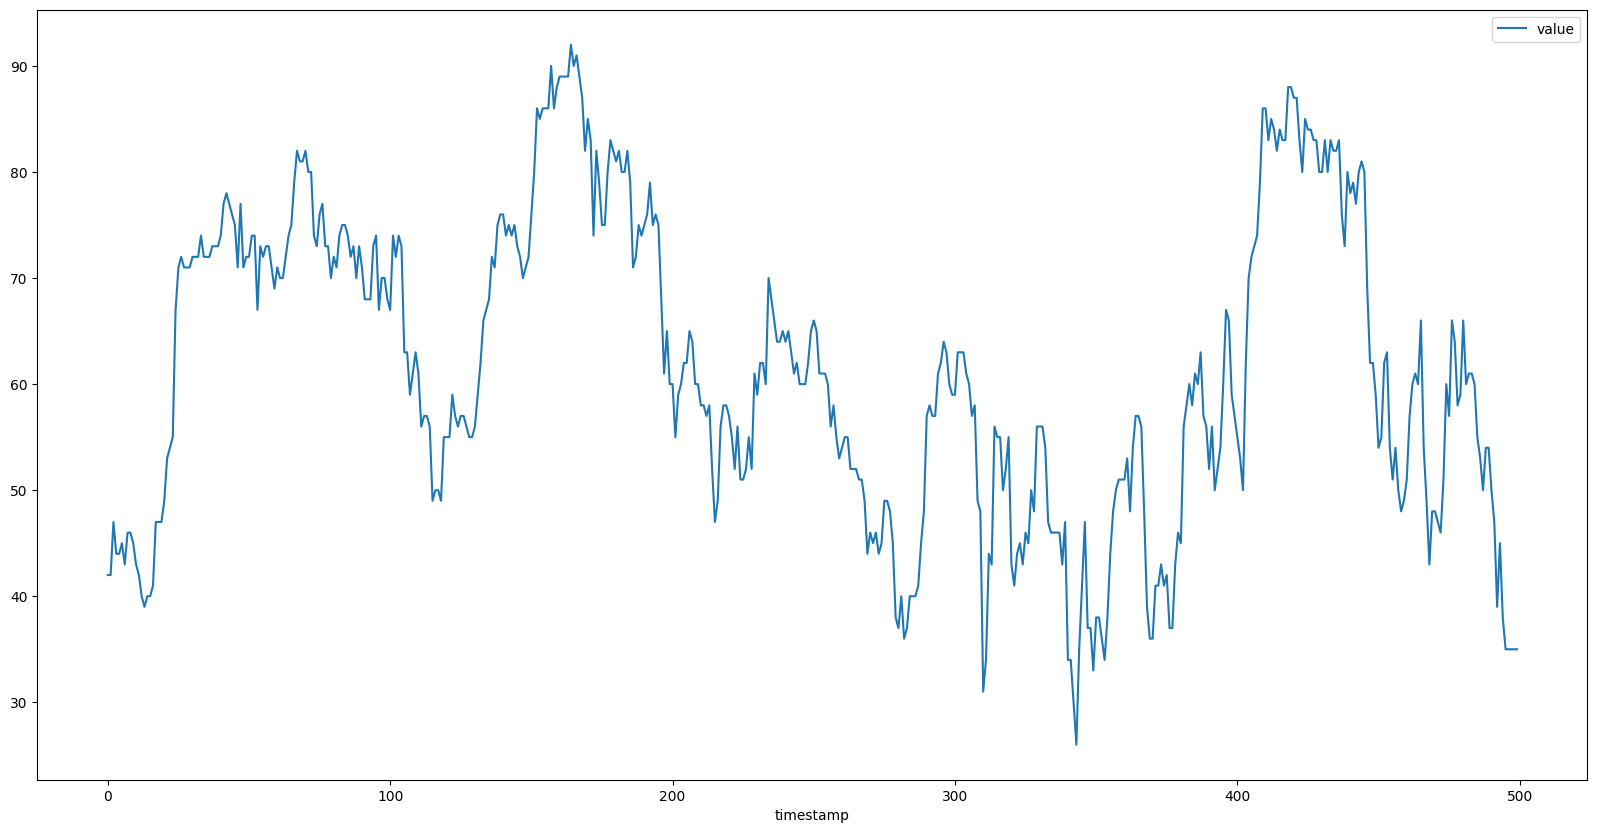

In [2]:
import json
import pandas as pd

# Spécifiez le chemin vers votre fichier JSON
path = "../Data/fear-and-greed.json"

# Ouvrir et lire le fichier JSON
with open(path, "r", encoding="utf-8") as f:
    contenu = json.load(f)

# Créer un DataFrame à partir de la liste de dictionnaires associée à la clé "data"
df = pd.DataFrame(contenu["data"])

# On corrige les date
df["timestamp"] = pd.to_numeric(df["timestamp"])
df["timestamp"] = (df["timestamp"] - df["timestamp"].iat[-1]) / 86400


df.plot(x="timestamp", y="value", figsize=(20, 10))


1 - Première approche naïve : Si peur on achète

In [3]:
if df["value_classification"].iat[0] == "Fear":
    print("Buy : " + str(100 - df["value"].iat[0]) + " €")
elif df["value_classification"].iat[0] == "Extreme_Fear":
    print("Buy : " + str((100 - df["value"].iat[0]) * 2) + " €")

Buy : 65 €


2 - Si plus petit que la veille on compare avec les min locaux

In [ ]:
import numpy as np
import scipy as sp

# Coefficient en fonction de l'état
coeff = {
    "Extreme fear": 2,
    "Fear": 1,
    "Neutral": 0.5,
    "Greed": 0,
    "Extreme greed": 0    
}


# Valeur du fag de la journée
valeur_actuelle = df["value"].iat[0]
valeur_veille = df["value"].iat[1]

# Si plus petit que la veille
if valeur_actuelle <= valeur_veille:

    # On cherche les min locaux hors la première valeure
    data = np.array(df["value"][1::])

    # On trouve les arguments des min locaux
    minima_indices = sp.signal.argrelextrema(data, np.less)[0]

    # On affiche leur valeur
    minima = [int(data[i]) for i in minima_indices]

    # On tri par ordre croissant la list
    minima.sort()

    # On regarde la position de la valeure actuelle dans le tableau (première apparition)
    for m, index in enumerate(minima):
        if m >= valeur_actuelle:
            pos = index

    # Plus on est petit plus le min atteint est faible
    # On définit un pourcentage de la liste parcouru 100% = index 0 0% = index len
    pourcentage = 1 - pos / (len(data) - 1)
    pourcentage = round(pourcentage * 100)  
    
    # On applique le coefficient 
    prix = pourcentage * coeff[df["value_classification"].iat[0]]
    
    # Prix à l'achat
    print("Buy : " + str(prix) + " €")
    
    

Buy : 82
